# Analyzing "Car" dataset to <i>"Predict the Price of Car"</i>

<b>Dataset has been imported from the below given link</b>

https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv

### Table of Content

<ol>
    <li> <a href="#importing_dataset">Importing Dataset</a>
    <li> <a href="#">Data Wrangling</a>
    <ol type="a">
        <li> <a href="#">Identify and Handle Missing Values</a>
        <ul>
            <li> <a href="#">Identifying Missing Values</a>
            <li> <a href="#">Correct Data Format</a>
            <li> <a href="#">Deal with Missing Values</a>
        </ul>
        <li> <a href="#">Data Standardization</a>
        <li> <a href="#">Data Normalization</a>
        <li> <a href="#">Binning</a>
        <li> <a href="#">Indicator Variable / Dummy Variable</a>
    </ol>
    <li> <a href="#">Exploratory Data Analysis</a>
    <ol type="a">
        <li> <a href="#">Correlation and Causation</a>
        <li> <a href="#">Analyzing Individual Feature Patter using Visualization</a>
        <ul>
            <li> <a href="#">Visualising all Feature variables with Taget variable using "Regplots"</a>
            <li> <a href="#">Visualising all Feature variables with Taget variable using "Boxplots"</a>
        </ul>
        <li> <a href="#">Descriptive Statistical Analysis</a>
    </ol>
    <li> <a href="#">Model Development</a>
    <ol type="a">
        <li> <a href="#">Multiple Linear Regression</a>
        <li> <a href="#">Measures for In-Sample Evaluation</a>
        <ul>
            <li> <a href="#">R-squared value</a>
            <li> <a href="#">Mean Square Error</a>
        </ul>
    </ol>
</ol>

# 1) Importing Dataset

In [1]:
# Importing pandas library to work on dataset
import pandas as pd

# Fetching the dataset into a dataframe
path = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv"
df = pd.read_csv(path, header=None)

#Since our dataset doesn't contains headers
#Hence we are including parameter - header=None

In [2]:
# Checking for dataset shape
df.shape

(205, 26)

In [3]:
# Displaying first ten rows of dataset
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


In [4]:
# As we can see there are no column headings
# Hence we are adding them manually
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

df.columns = headers
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


# 2) Data Wrangling

<i>Data Wrangling is the process of converting data from the initial format to a format that may be better for analysis.</i>

<p><b>Data Wrangling includes:</b></p>
<ul>
    <li> Identify and Handle Missing Values
    <li> Data Standardization
    <li> Data Normalization (Centering / Scaling)
    <li> Binning
    <li> Indicator Variable
</ul>

## a) Identify and Handle Missing Values

As we can see, several question marks appeared in the dataframe; those are missing values which may hinder our further analysis. 

<b>How to work with missing data?</b>
<ol>
    <li>identify missing data</li>
    <li>correct data format</li>
    <li>deal with missing data</li>
</ol>

### I. IDENTIFYING MISSING VALUES

<b>Convert "?" to NaN</b>

In the car dataset, missing data comes with the question mark "?".
We replace "?" with NaN (Not a Number), which is Python's default missing value marker, for reasons of computational speed and convenience. Here we use the function: 

<code>.replace(A, B, inplace = True)</code>

to replace A by B

In [5]:
# importing numpy to use np.nan
import numpy as np

# Replacing '?' with 'NaN'
df.replace("?", np.nan, inplace = True)
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,NaN


#### Evaluating for Missing Data

The missing values are converted to Python's default. We use Python's built-in functions to identify these missing values. There are two methods to detect missing data:
<ol>
    <li><b>.isnull()</b></li>
    <li><b>.notnull()</b></li>
</ol>
The output is a boolean value indicating whether the value that is passed into the argument is in fact missing data.

In [6]:
# Counting null values corresponding to each columns
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

### II. Correct data format
<p>Now we will check and make sure that all data is in the correct format (int, float, text or other).</p>

In Pandas, we use
<p><b>.dtype()</b> to check the data type</p>
<p><b>.astype()</b> to change the data type</p>

In [7]:
# Checking for datatypes of each column
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [8]:
# Correcting data format
df[["normalized-losses","bore", "stroke","horsepower","peak-rpm","price"]] = df[["normalized-losses","bore", "stroke","horsepower","peak-rpm","price"]].astype("float")

### III. Deal with missing data
<b>How to deal with missing data?</b>

<ol>
    <li>drop data<br>
        a. drop the whole row<br>
        b. drop the whole column
    </li>
    <li>replace data<br>
        a. replace it by mean<br>
        b. replace it by frequency<br>
        c. replace it based on other functions
    </li>
</ol>

Whole columns should be dropped only if most entries in the column are empty. In our dataset, none of the columns are empty enough to drop entirely.
We have some freedom in choosing which method to replace data; however, some methods may seem more reasonable than others. We will apply each method to many different columns:

<b>Replace by mean:</b>
<ul>
    <li>"normalized-losses": 41 missing data, replace them with mean</li>
    <li>"stroke": 4 missing data, replace them with mean</li>
    <li>"bore": 4 missing data, replace them with mean</li>
    <li>"horsepower": 2 missing data, replace them with mean</li>
    <li>"peak-rpm": 2 missing data, replace them with mean</li>
</ul>

<b>Replace by frequency:</b>
<ul>
    <li>"num-of-doors": 2 missing data, replace them with "four". 
        <ul>
            <li>Reason: 84% sedans is four doors. Since four doors is most frequent, it is most likely to occur</li>
        </ul>
    </li>
</ul>

<b>Drop the whole row:</b>
<ul>
    <li>"price": 4 missing data, simply delete the whole row
        <ul>
            <li>Reason: price is what we want to predict. Any data entry without price data cannot be used for prediction; therefore any row now without price data is not useful to us</li>
        </ul>
    </li>
</ul>

<h4>Replace "NaN" by mean value in "normalized-losses" column</h4>

In [9]:
# Calculating mean of "normalized-losses" column
avg_normalized_losses = df["normalized-losses"].mean(axis=0)

# Replacing NaN with mean of column
df["normalized-losses"].replace(np.nan, avg_normalized_losses, inplace=True)

<h4>Replace "NaN" by mean value in "bore" column</h4>

In [10]:
# Calculating mean of "bore" column
avg_bore = df['bore'].mean(axis=0)

# Replacing NaN with mean of column
df["bore"].replace(np.nan, avg_bore, inplace=True)

<h4>Replace "NaN" by mean value in "stroke" column</h4>

In [11]:
# Calculating mean of "stroke" column
avg_stroke = df['stroke'].mean(axis=0)

# Replacing NaN with mean of column
df["stroke"].replace(np.nan, avg_stroke, inplace=True)

<h4>Replace "NaN" by mean value in "horsepower" column</h4>

In [12]:
# Calculating mean of "horsepower" column
avg_horsepower = df['horsepower'].mean(axis=0)

# Replacing NaN with mean of column
df["horsepower"].replace(np.nan, avg_horsepower, inplace=True)

<h4>Replace "NaN" by mean value in "peak-rpm" column</h4>

In [13]:
# Calculating mean of "peak-rpm" column
avg_peak_rpm = df['peak-rpm'].mean(axis=0)

# Replacing NaN with mean of column
df["peak-rpm"].replace(np.nan, avg_peak_rpm, inplace=True)

<h4>Replace "NaN" by most frequent value in "num-of-doors" column</h4>

In [14]:
print("Column Values with their frequency")
# To count different kind of values present in a column
print(df['num-of-doors'].value_counts())


print()
print()


print("Most frequent Value")
# To find value that has max frequency in a column
print(df['num-of-doors'].value_counts().idxmax())


#replacing missing 'num-of-doors' values by the most frequent 
df["num-of-doors"].replace(np.nan, "four", inplace=True)

Column Values with their frequency
four    114
two      89
Name: num-of-doors, dtype: int64


Most frequent Value
four


<h4>Dropping all the rows with missing price data</h4>

In [15]:
# Drop whole row with NaN in "price" column
df.dropna(subset=["price"], axis=0, inplace=True)

# reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)

## b) Data Standardization
<p>
Data is usually collected from different agencies with different formats.
(Data Standardization is also a term for a particular type of data normalization, where we subtract the mean and divide by the standard deviation)
</p>
    
<b>What is Standardization?</b>
<p>Standardization is the process of transforming data into a common format which allows the researcher to make the meaningful comparison.
</p>

<b>Example</b>
<p>Transform mpg to L/100km:</p>
<p>In our dataset, the fuel consumption columns "city-mpg" and "highway-mpg" are represented by mpg (miles per gallon) unit. Assume we are developing an application in a country that accept the fuel consumption with L/100km standard</p>
<p>We will need to apply <b>data transformation</b> to transform mpg into L/100km?</p>

<p>The formula for unit conversion is<p>
<code>L/100km = 235 / mpg</code>

In [16]:
# Changing column values and column label for column "city-mpg" to "city-L/100km"
df['city-mpg'] = 235/df['city-mpg']
df.rename(columns={"city-mpg":"city-L/100km"}, inplace=True)

# Changing column values and column label for column "highway-mpg" to "highway-L/100km"
df['highway-mpg'] = 235/df['highway-mpg']
df.rename(columns={"highway-mpg":"highway-L/100km"}, inplace=True)

## c) Data Normalization

<b>Why normalization?</b>
<p>Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variance is 1, or scaling variable so the variable values range from 0 to 1</p>

### Ways of normalization
#### i. Simple Feature Scaling
<code>x<sub>(new)</sub> = x<sub>(old)</sub> / x<sub>(max)</sub></code>

#### ii. Min-Max
<code>x<sub>(new)</sub> = [x<sub>(old)</sub> - x<sub>(min)</sub>] / [x<sub>(max)</sub> - x<sub>(min)</sub>]</code>

#### iii. z-Score
<code>x<sub>(new)</sub> = [x<sub>(old)</sub> - Mean(mu)] / SD(sigma)</code>

<b>Example</b>
<p>To demonstrate normalization, let's say we want to scale the columns "length", "width" and "height" </p>
<p><b>Target:</b> would like to Normalize those variables so their value ranges from 0 to 1.</p>
<p><b>Approach:</b> replace original value by (original value)/(maximum value) <i><b>[Simple Feature Scaling]</b></i></p>

In [17]:
# Simple Feature Scaling on columns "length"
df['length'] = df['length'] / df['length'].max()

# Simple Feature Scaling on columns "width"
df['width'] = df['width'] / df['width'].max()

# Simple Feature Scaling on columns "height"
df['height'] = df['height'] / df['height'].max()

## d) Binning
<p><i>Binning</i> is a process of transforming continuous numerical variables into discrete categorical 'bins', for grouped analysis.</p>

<p>In our dataset, "horsepower" is a real valued variable ranging from 48 to 288, it has 57 unique values. What if we only care about the price difference between cars with high horsepower, medium horsepower, and little horsepower (3 types)? Can we rearrange them into three ‘bins' to simplify analysis? </p>

<p>We will use the Pandas method 'cut' to segment the 'horsepower' column into 3 bins</p>

In [18]:
df["horsepower"] = df["horsepower"].astype(int, copy=True)

Text(0, 0.5, 'count')

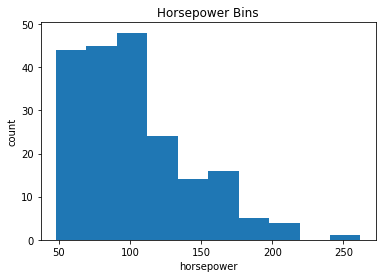

In [19]:
# Plotting Histogram of "horsepower" to see its distribution
%matplotlib inline
import matplotlib as plt
import matplotlib.pyplot as plt

plt.hist(df["horsepower"])

plt.title("Horsepower Bins")
plt.xlabel("horsepower")
plt.ylabel("count")

<p>We would like 3 bins of equal size bandwidth so we use numpy's <code>linspace(start_value, end_value, numbers_generated)</code> function.</p>
<p>Since we want to include the minimum value of horsepower we want to set start_value=min(df["horsepower"]).</p>
<p>Since we want to include the maximum value of horsepower we want to set end_value=max(df["horsepower"]).</p>
<p>Since we are building 3 bins of equal length, there should be 4 dividers, so numbers_generated=4.</p>

In [20]:
# Creating bin's range
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [21]:
# List of group's label
group_names = ['Low', 'Medium', 'High']

# Setting bins
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )

df[['horsepower','horsepower-binned']].head()

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low


In [22]:
df["horsepower-binned"].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

Text(0, 0.5, 'count')

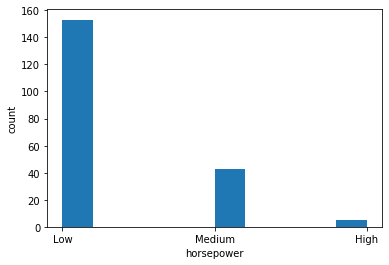

In [23]:
plt.hist(df["horsepower-binned"])

plt.xlabel("horsepower")
plt.ylabel("count")

## e) Indicator variable (or dummy variable)

<b>What is an indicator variable?</b>
<p>An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning.</p>

<b>Why we use indicator variables?</b>
<p>So we can use categorical variables for regression analysis.</p>

<p>We see the column "fuel-type" has two unique values, "gas" or "diesel". Regression doesn't understand words, only numbers. To use this attribute in regression analysis, we convert "fuel-type" into indicator variables.</p>

<p>We will use the panda's method 'get_dummies' to assign numerical values to different categories of fuel type. </p>

In [24]:
dummy_var = pd.get_dummies(df["fuel-type"])
dummy_var.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [25]:
# Changing column names for clarity
dummy_var.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)
dummy_var.head()

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


We now have the value 0 to represent "gas" and 1 to represent "diesel" in the column "fuel-type". We will now insert this column back into our original dataset. 

In [26]:
# merge data frame "df" and "dummy_var" 
df = pd.concat([df, dummy_var], axis = 1)

# drop original column "fuel-type" from "df"
df.drop("fuel-type", axis = 1, inplace=True)

 Creating indicator variable to the column of "aspiration": "std" to 0, while "turbo" to 1.

In [27]:
dummy_var = pd.get_dummies(df['aspiration'])
dummy_var.head()

,std,turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [28]:
dummy_var.rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)
dummy_var.head()

,aspiration-std,aspiration-turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [29]:
# merge data frame "df" and "dummy_var" 
df = pd.concat([df, dummy_var], axis = 1)

# drop original column "fuel-type" from "df"
df.drop("aspiration", axis = 1, inplace=True)

In [30]:
df.shape

(201, 29)

# 3) Exploratory Data Analysis (EDA)

<p><b>Exploratory Data Analysis (EDA)</b>, also known as Data Exploration, is a step in the Data Analysis Process, where a number of techniques are used to better understand the dataset being used.</p>

‘Understanding the dataset’ can refer to a number of things including but not limited to…
>Extracting important variables and leaving behind useless variables

>Identifying outliers, missing values, or human error

>Understanding the relationship(s), or lack of, between variables

>Ultimately, maximizing your insights of a dataset and minimizing potential error that may occur later in the process

## a) Correlation and Causation

<p><b>Correlation</b>: a measure of the extent of interdependence between variables.</p>

<p><b>Causation</b>: the relationship between cause and effect between two variables.</p>

<p>It is important to know the difference between these two and that correlation does not imply causation. Determining correlation is much simpler the determining causation as causation may require independent experimentation.</p>



### Pearson Correlation
<p>The Pearson Correlation measures the linear dependence between two variables X and Y.</p>
<p>The resulting coefficient is a value between -1 and 1 inclusive, where:</p>
<ul>
    <li><b>1</b> : Total positive linear correlation.</li>
    <li><b>0</b> : No linear correlation, the two variables most likely do not affect each other.</li>
    <li><b>-1</b> : Total negative linear correlation.</li>
</ul>

<b>Pearson Correlation is the default method of the function "corr".</b>

### Correlation between Feature Variables

We can calculate the correlation between variables of type "int64" or "float64" using the method "corr"

In [31]:
correlation = df.corr()
correlation

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,-0.182196,0.075810,0.279740,0.066171,-0.029807,-0.082391,-0.196735,0.196735,0.054615,-0.054615
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,-0.114713,0.217300,0.239543,0.238567,0.181189,0.133999,-0.101546,0.101546,0.006911,-0.006911
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,0.250313,0.371178,-0.360305,0.476153,0.577576,0.584642,0.307237,-0.307237,-0.256889,0.256889
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,0.159733,0.579795,-0.285970,0.657373,0.707108,0.690628,0.211187,-0.211187,-0.230085,0.230085
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,0.189867,0.615056,-0.245800,0.673363,0.736728,0.751265,0.244356,-0.244356,-0.305732,0.305732
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,0.259737,-0.087001,-0.309974,0.003811,0.084301,0.135486,0.281578,-0.281578,-0.090336,0.090336
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,0.156433,0.757981,-0.279361,0.785353,0.836921,0.834415,0.221046,-0.221046,-0.321955,0.321955
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,0.028889,0.822668,-0.256733,0.745059,0.783465,0.872335,0.070779,-0.070779,-0.110040,0.110040
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566903,-0.267392,0.554610,0.559112,0.543155,0.054458,-0.054458,-0.227816,0.227816
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,0.187871,0.098128,-0.063561,0.036133,0.047089,0.082269,0.241064,-0.241064,-0.218233,0.218233


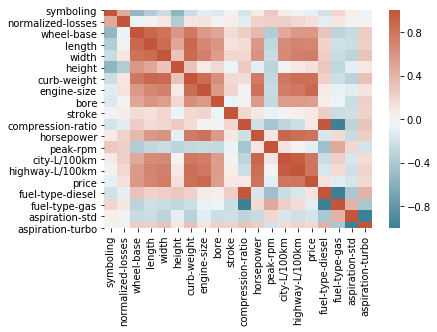

In [32]:
# seaborn is a visualizing package
# We will be using both seaborn and matplotlib for visualization
import seaborn as sns

# Plotting the heatmap
sns.heatmap(correlation,
            xticklabels=correlation.columns,
            yticklabels=correlation.columns,
            cmap=sns.diverging_palette(220, 20, as_cmap=True))

<i>The diagonal elements are always one</i>

<p>sometimes we would like to know the significant of the correlation estimate.</p>

### P-value
<p>The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the
<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>

In [33]:
# Obtaining above information using  "stats" module in the "scipy"  library.
from scipy import stats

#### Symboling vs Price

Let's calculate the  Pearson Correlation Coefficient and P-value of 'symboling' and 'price'.

In [34]:
pearson_coef, p_value = stats.pearsonr(df['symboling'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, "with a P-value of", p_value)

The Pearson Correlation Coefficient is -0.08239118716962358 with a P-value of 0.2449148765716521


#### Normalized-losses vs Price

Let's calculate the  Pearson Correlation Coefficient and P-value of 'normalized-losses' and 'price'.

In [35]:
pearson_coef, p_value = stats.pearsonr(df['normalized-losses'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, "with a P-value of", p_value)

The Pearson Correlation Coefficient is 0.13399873429274334 with a P-value of 0.05789749352703121


#### Wheel-base vs Price

Let's calculate the  Pearson Correlation Coefficient and P-value of 'wheel-base' and 'price'.

In [36]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, "with a P-value of", p_value)

The Pearson Correlation Coefficient is 0.5846418222655081 with a P-value of 8.076488270732989e-20


#### Length vs Price

Let's calculate the  Pearson Correlation Coefficient and P-value of 'length' and 'price'.

In [37]:
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, "with a P-value of", p_value)

The Pearson Correlation Coefficient is 0.6906283804483642 with a P-value of 8.016477466158759e-30


#### Width vs Price

Let's calculate the  Pearson Correlation Coefficient and P-value of 'width' and 'price'.

In [38]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, "with a P-value of", p_value)

The Pearson Correlation Coefficient is 0.7512653440522673 with a P-value of 9.200335510481646e-38


#### Height vs Price

Let's calculate the  Pearson Correlation Coefficient and P-value of 'height' and 'price'.

In [39]:
pearson_coef, p_value = stats.pearsonr(df['height'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, "with a P-value of", p_value)

The Pearson Correlation Coefficient is 0.13548630756805974 with a P-value of 0.055146273251013435


#### Curb-weight vs Price

Let's calculate the  Pearson Correlation Coefficient and P-value of 'curb-weight' and 'price'.

In [40]:
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, "with a P-value of", p_value)

The Pearson Correlation Coefficient is 0.8344145257702846 with a P-value of 2.1895772388936914e-53


#### Engine-size vs Price

Let's calculate the  Pearson Correlation Coefficient and P-value of 'engine-size' and 'price'.

In [41]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, "with a P-value of", p_value)

The Pearson Correlation Coefficient is 0.8723351674455185 with a P-value of 9.265491622198389e-64


#### Bore vs Price

Let's calculate the  Pearson Correlation Coefficient and P-value of 'bore' and 'price'.

In [42]:
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, "with a P-value of", p_value)

The Pearson Correlation Coefficient is 0.5431553832626602 with a P-value of 8.049189483935489e-17


#### Stroke vs Price

Let's calculate the  Pearson Correlation Coefficient and P-value of 'stroke' and 'price'.

In [43]:
pearson_coef, p_value = stats.pearsonr(df['stroke'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, "with a P-value of", p_value)

The Pearson Correlation Coefficient is 0.08226928855325809 with a P-value of 0.24561612487745918


#### Compression-ratio vs Price

Let's calculate the  Pearson Correlation Coefficient and P-value of 'compression-ratio' and 'price'.

In [44]:
pearson_coef, p_value = stats.pearsonr(df['compression-ratio'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, "with a P-value of", p_value)

The Pearson Correlation Coefficient is 0.07110732668194145 with a P-value of 0.3158110188729282


#### Horsepower vs Price

Let's calculate the  Pearson Correlation Coefficient and P-value of 'horsepower' and 'price'.

In [45]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, "with a P-value of", p_value)

The Pearson Correlation Coefficient is 0.8096068016571054 with a P-value of 6.273536270650504e-48


#### Peak-rpm vs Price

Let's calculate the  Pearson Correlation Coefficient and P-value of 'peak-rpm' and 'price'.

In [46]:
pearson_coef, p_value = stats.pearsonr(df['peak-rpm'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, "with a P-value of", p_value)

The Pearson Correlation Coefficient is -0.10161587407588146 with a P-value of 0.1511769165144532


#### City-L/100km vs Price

Let's calculate the  Pearson Correlation Coefficient and P-value of 'city-L/100km' and 'price'.

In [47]:
pearson_coef, p_value = stats.pearsonr(df['city-L/100km'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, "with a P-value of", p_value)

The Pearson Correlation Coefficient is 0.7898975136626942 with a P-value of 3.903106400939858e-44


#### Highway-L/100km vs Price

Let's calculate the  Pearson Correlation Coefficient and P-value of 'highway-L/100km' and 'price'.

In [48]:
pearson_coef, p_value = stats.pearsonr(df['highway-L/100km'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, "with a P-value of", p_value)

The Pearson Correlation Coefficient is 0.8011176263981975 with a P-value of 3.046784581041283e-46


#### Fuel-type-diesel vs Price

Let's calculate the  Pearson Correlation Coefficient and P-value of 'fuel-type-diesel' and 'price'.

In [49]:
pearson_coef, p_value = stats.pearsonr(df['fuel-type-diesel'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, "with a P-value of", p_value)

The Pearson Correlation Coefficient is 0.11032556467564857 with a P-value of 0.11896254438091342


#### Fuel-type-gas vs Price

Let's calculate the  Pearson Correlation Coefficient and P-value of 'fuel-type-gas' and 'price'.

In [50]:
pearson_coef, p_value = stats.pearsonr(df['fuel-type-gas'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, "with a P-value of", p_value)

The Pearson Correlation Coefficient is -0.11032556467564855 with a P-value of 0.11896254438091342


#### Aspiration-std vs Price

Let's calculate the  Pearson Correlation Coefficient and P-value of 'aspiration-std' and 'price'.

In [51]:
pearson_coef, p_value = stats.pearsonr(df['aspiration-std'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, "with a P-value of", p_value)

The Pearson Correlation Coefficient is -0.17957848135197413 with a P-value of 0.010745853841803764


#### Aspiration-turbo vs Price

Let's calculate the  Pearson Correlation Coefficient and P-value of 'aspiration-turbo' and 'price'.

In [52]:
pearson_coef, p_value = stats.pearsonr(df['aspiration-turbo'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, "with a P-value of", p_value)

The Pearson Correlation Coefficient is 0.17957848135197413 with a P-value of 0.010745853841803764


#### Conclusion :

<p>Target Variable : <i>price</i></p>

<p>Selected Feature Variables : <i>normalized-losses, wheel-base, length, width, height, curb-weight, engine-size, bore, horsepower, peak-rpm, city-L/100km, highway-L/100km, fuel-type-diesel, fuel-type-gas, aspiration-std, aspiration-turbo</i></p>

In [53]:
# dataframe with only feature variables
features = df[["normalized-losses","wheel-base","length","width","height","curb-weight","engine-size","bore",
               "horsepower","peak-rpm","city-L/100km","highway-L/100km","fuel-type-diesel","fuel-type-gas",
               "aspiration-std","aspiration-turbo"]]

# dataframe with only target variable
target = df[["price"]]

# dataframe with both feature variables and target variable
df1 = df[["normalized-losses","wheel-base","length","width","height","curb-weight","engine-size","bore",
               "horsepower","peak-rpm","city-L/100km","highway-L/100km","fuel-type-diesel","fuel-type-gas",
               "aspiration-std","aspiration-turbo","price"]]

## b) Analyzing Individual Feature Pattern using Visualization

### I. <i>Visualising all Feature variables with Taget variable using "Regplots"</i>

Text(0, 0.5, 'price')

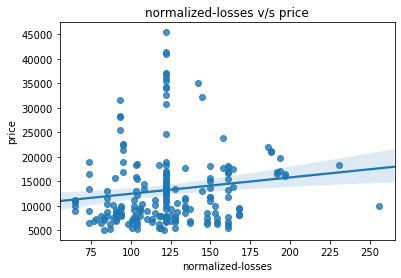

In [54]:
sns.regplot(x="normalized-losses", y="price", data=df1)

plt.title("normalized-losses v/s price")
plt.xlabel("normalized-losses")
plt.ylabel("price")

Text(0, 0.5, 'price')

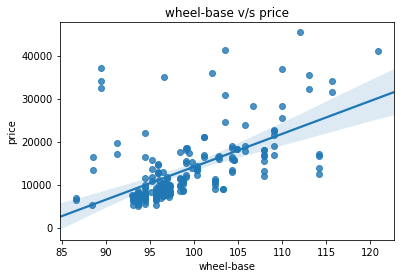

In [55]:
sns.regplot(x="wheel-base", y="price", data=df1)

plt.title("wheel-base v/s price")
plt.xlabel("wheel-base")
plt.ylabel("price")

Text(0, 0.5, 'price')

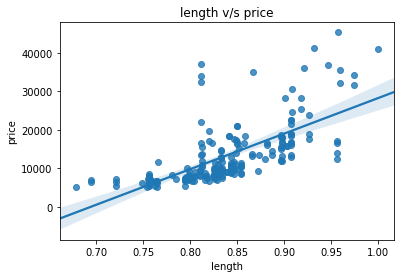

In [56]:
sns.regplot(x="length", y="price", data=df1)

plt.title("length v/s price")
plt.xlabel("length")
plt.ylabel("price")

Text(0, 0.5, 'price')

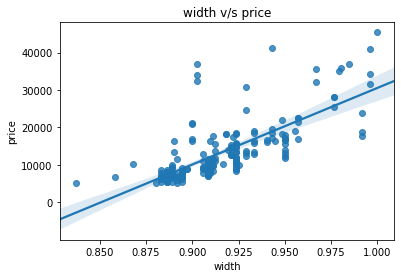

In [57]:
sns.regplot(x="width", y="price", data=df1)

plt.title("width v/s price")
plt.xlabel("width")
plt.ylabel("price")

Text(0, 0.5, 'price')

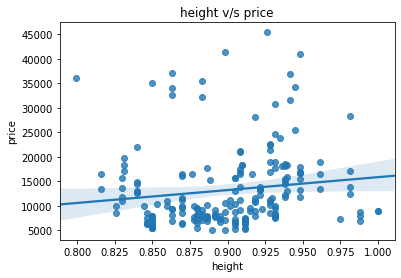

In [58]:
sns.regplot(x="height", y="price", data=df1)

plt.title("height v/s price")
plt.xlabel("height")
plt.ylabel("price")

Text(0, 0.5, 'price')

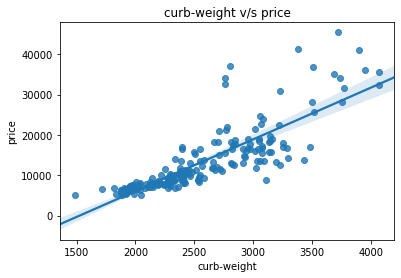

In [59]:
sns.regplot(x="curb-weight", y="price", data=df1)

plt.title("curb-weight v/s price")
plt.xlabel("curb-weight")
plt.ylabel("price")

Text(0, 0.5, 'price')

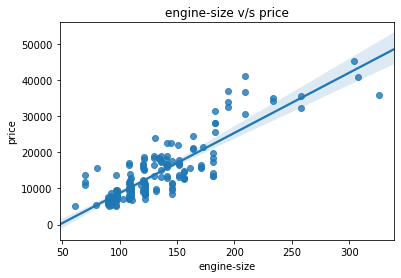

In [60]:
sns.regplot(x="engine-size", y="price", data=df1)

plt.title("engine-size v/s price")
plt.xlabel("engine-size")
plt.ylabel("price")

Text(0, 0.5, 'price')

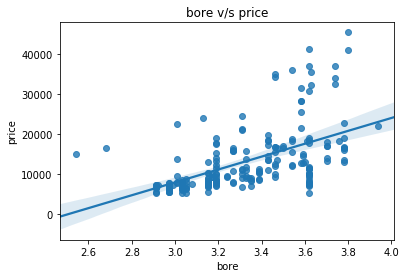

In [61]:
sns.regplot(x="bore", y="price", data=df1)

plt.title("bore v/s price")
plt.xlabel("bore")
plt.ylabel("price")

Text(0, 0.5, 'price')

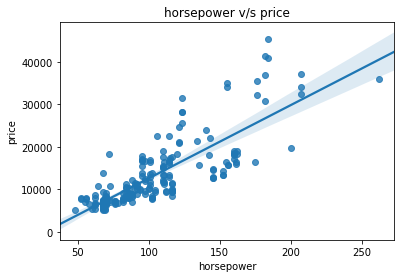

In [62]:
sns.regplot(x="horsepower", y="price", data=df1)

plt.title("horsepower v/s price")
plt.xlabel("horsepower")
plt.ylabel("price")

Text(0, 0.5, 'price')

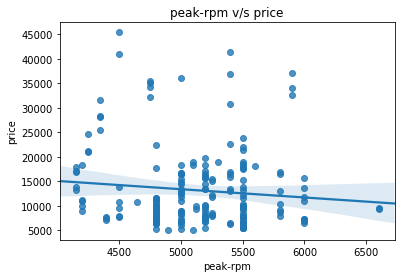

In [63]:
sns.regplot(x="peak-rpm", y="price", data=df1)

plt.title("peak-rpm v/s price")
plt.xlabel("peak-rpm")
plt.ylabel("price")

Text(0, 0.5, 'price')

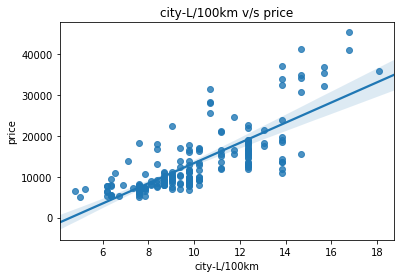

In [64]:
sns.regplot(x="city-L/100km", y="price", data=df1)

plt.title("city-L/100km v/s price")
plt.xlabel("city-L/100km")
plt.ylabel("price")

Text(0, 0.5, 'price')

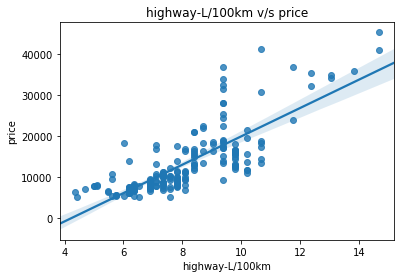

In [65]:
sns.regplot(x="highway-L/100km", y="price", data=df1)

plt.title("highway-L/100km v/s price")
plt.xlabel("highway-L/100km")
plt.ylabel("price")

Text(0, 0.5, 'price')

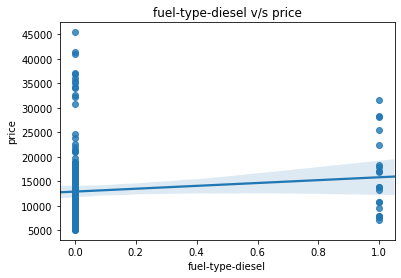

In [66]:
sns.regplot(x="fuel-type-diesel", y="price", data=df1)

plt.title("fuel-type-diesel v/s price")
plt.xlabel("fuel-type-diesel")
plt.ylabel("price")

Text(0, 0.5, 'price')

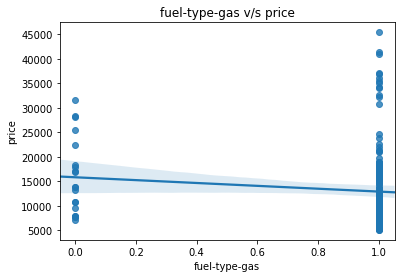

In [67]:
sns.regplot(x="fuel-type-gas", y="price", data=df1)

plt.title("fuel-type-gas v/s price")
plt.xlabel("fuel-type-gas")
plt.ylabel("price")

Text(0, 0.5, 'price')

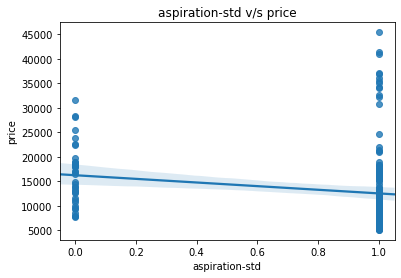

In [68]:
sns.regplot(x="aspiration-std", y="price", data=df1)

plt.title("aspiration-std v/s price")
plt.xlabel("aspiration-std")
plt.ylabel("price")

Text(0, 0.5, 'price')

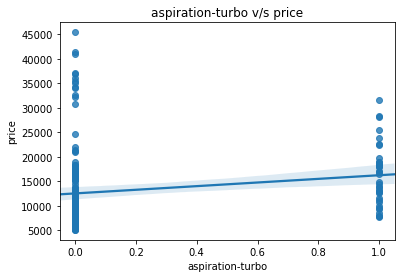

In [69]:
sns.regplot(x="aspiration-turbo", y="price", data=df1)

plt.title("aspiration-turbo v/s price")
plt.xlabel("aspiration-turbo")
plt.ylabel("price")

#### Conclusion :

<p><i>Since, "normalized-losses", "height", "peak-rpm", "fuel-type-diesel", "fuel-type-gas", "aspiration-std", "aspiration-turbo" have <b>WEAK LINEAR RELATIONSHIP</b> with target variable "price". Hence, we exclude them for price prediction</i></p>

<p>Target Variable : <i>price</i></p>

<p>Selected Feature Variables : <i>wheel-base, length, width, curb-weight, engine-size, bore, horsepower, city-L/100km, highway-L/100km</i></p>

In [70]:
# dataframe with only feature variables
features = df[["wheel-base","length","width","curb-weight","engine-size","bore","horsepower","city-L/100km","highway-L/100km"]]

# dataframe with only target variable
target = df[["price"]]

# dataframe with both feature variables and target variable
df1 = df[["wheel-base","length","width","curb-weight","engine-size","bore","horsepower","city-L/100km","highway-L/100km","price"]]

### II. <i>Visualising all Feature variables with Taget variable using "Boxplots"</i>

<p>These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots.</p>

Text(0.5, 1.0, 'make v/s price')

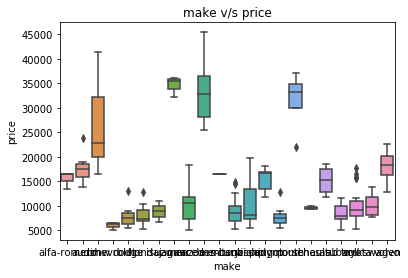

In [71]:
sns.boxplot(x="make", y="price", data=df)
plt.title("make v/s price")

Text(0.5, 1.0, 'num-of-doors v/s price')

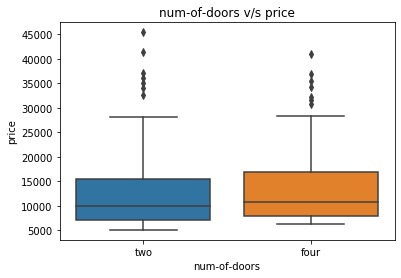

In [72]:
sns.boxplot(x="num-of-doors", y="price", data=df)
plt.title("num-of-doors v/s price")

Text(0.5, 1.0, 'body-style v/s price')

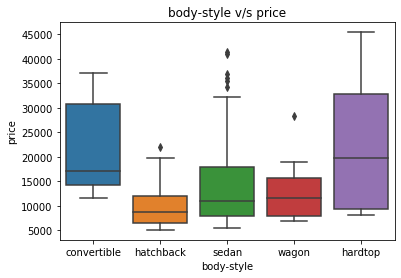

In [73]:
sns.boxplot(x="body-style", y="price", data=df)
plt.title("body-style v/s price")

Text(0.5, 1.0, 'drive-wheels v/s price')

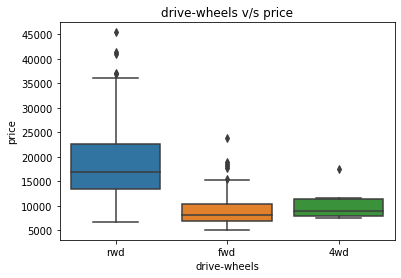

In [74]:
sns.boxplot(x="drive-wheels", y="price", data=df)
plt.title("drive-wheels v/s price")

Text(0.5, 1.0, 'engine-location v/s price')

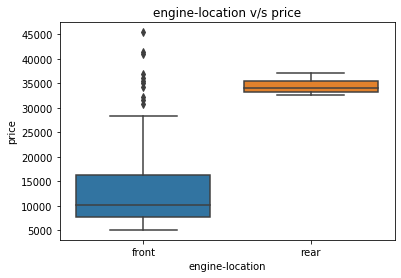

In [75]:
sns.boxplot(x="engine-location", y="price", data=df)
plt.title("engine-location v/s price")

Text(0.5, 1.0, 'engine-type v/s price')

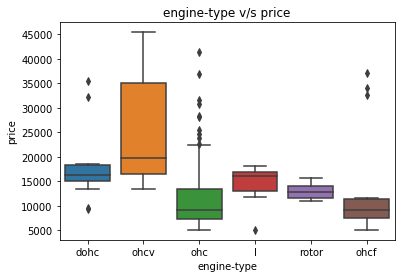

In [76]:
sns.boxplot(x="engine-type", y="price", data=df)
plt.title("engine-type v/s price")

Text(0.5, 1.0, 'num-of-cylinders v/s price')

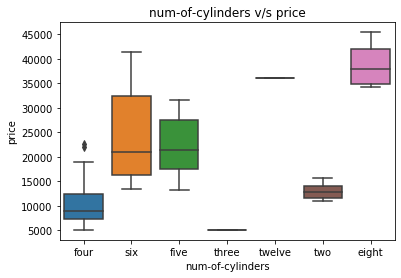

In [77]:
sns.boxplot(x="num-of-cylinders", y="price", data=df)
plt.title("num-of-cylinders v/s price")

#### Conclusion :

<p>Here we see that the distribution of price between the two engine-location categories, seven num-of-cylinders, are distinct enough to take both of them as a potential good predictor of price.</p>

<p>Target Variable : <i>price</i></p>

<p>Selected Feature Variables : <i>wheel-base, length, width, curb-weight, engine-size, bore, horsepower, city-L/100km, highway-L/100km, engine-location, num-of-cylinders</i></p>

In [78]:
# dataframe with only feature variables
features = df[["wheel-base","length","width","curb-weight","engine-size","bore","horsepower","city-L/100km",
               "highway-L/100km","engine-location","num-of-cylinders"]]

# dataframe with only target variable
target = df[["price"]]

# dataframe with both feature variables and target variable
df1 = df[["wheel-base","length","width","curb-weight","engine-size","bore","horsepower","city-L/100km",
          "highway-L/100km","price","engine-location","num-of-cylinders"]]

## c) Descriptive Statistical Analysis

<p>The <b>describe</b> function automatically computes basic statistics for all continuous variables. Any NaN values are automatically skipped in these statistics.</p>

This will show:
<ul>
    <li>the count of that variable</li>
    <li>the mean</li>
    <li>the standard deviation (std)</li> 
    <li>the minimum value</li>
    <li>the IQR (Interquartile Range: 25%, 50% and 75%)</li>
    <li>the maximum value</li>
<ul>

 We can apply the method "describe" as follows:

In [79]:
df1.describe()

,wheel-base,length,width,curb-weight,engine-size,bore,horsepower,city-L/100km,highway-L/100km,price
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,98.797015,0.837102,0.915126,2555.666667,126.875622,3.330692,103.402985,9.944145,8.044957,13207.129353
std,6.066366,0.059213,0.029187,517.296727,41.546834,0.268072,37.365650,2.534599,1.840739,7947.066342
min,86.600000,0.678039,0.837500,1488.000000,61.000000,2.540000,48.000000,4.795918,4.351852,5118.000000
25%,94.500000,0.801538,0.890278,2169.000000,98.000000,3.150000,70.000000,7.833333,6.911765,7775.000000
50%,97.000000,0.832292,0.909722,2414.000000,120.000000,3.310000,95.000000,9.791667,7.833333,10295.000000
75%,102.400000,0.881788,0.925000,2926.000000,141.000000,3.580000,116.000000,12.368421,9.400000,16500.000000
max,120.900000,1.000000,1.000000,4066.000000,326.000000,3.940000,262.000000,18.076923,14.687500,45400.000000


The default setting of "describe" skips variables of type object. We can apply the method "describe" on the variables of type 'object' as follows:

In [80]:
df1.describe(include=['object'])

,engine-location,num-of-cylinders
count,201,201
unique,2,7
top,front,four
freq,198,157


"describe" method with both continuous variables and variable of the type object can be used as follows:

In [81]:
df1.describe(include="all")

,wheel-base,length,width,curb-weight,engine-size,bore,horsepower,city-L/100km,highway-L/100km,price,engine-location,num-of-cylinders
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201,201
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,7
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,front,four
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,198,157
mean,98.797015,0.837102,0.915126,2555.666667,126.875622,3.330692,103.402985,9.944145,8.044957,13207.129353,NaN,NaN
std,6.066366,0.059213,0.029187,517.296727,41.546834,0.268072,37.365650,2.534599,1.840739,7947.066342,NaN,NaN
min,86.600000,0.678039,0.837500,1488.000000,61.000000,2.540000,48.000000,4.795918,4.351852,5118.000000,NaN,NaN
25%,94.500000,0.801538,0.890278,2169.000000,98.000000,3.150000,70.000000,7.833333,6.911765,7775.000000,NaN,NaN
50%,97.000000,0.832292,0.909722,2414.000000,120.000000,3.310000,95.000000,9.791667,7.833333,10295.000000,NaN,NaN
75%,102.400000,0.881788,0.925000,2926.000000,141.000000,3.580000,116.000000,12.368421,9.400000,16500.000000,NaN,NaN


### Value Counts

<p>Value-counts is a good way of understanding how many units of each characteristic/variable we have.</p>

<p>We can apply the "value_counts" method on the column 'engine-location' and 'num-of-cylinders'.</p>

<p><b>NOTE : </b><i>Don’t forget the method "value_counts" only works on Pandas series, not Pandas Dataframes. As a result, we only include one bracket "df['engine-location'] and df['num-of-cylinders']" not two brackets "df[['engine-location','num-of-cylinders']]".</i></p>

In [82]:
df['engine-location'].value_counts()

front    198
rear       3
Name: engine-location, dtype: int64

In [83]:
df['num-of-cylinders'].value_counts()

four      157
six        24
five       10
eight       4
two         4
three       1
twelve      1
Name: num-of-cylinders, dtype: int64

#### Conclusion :

<p>Examining the value counts of the <b>engine-location</b> would not be a good predictor variable for the <b>price</b>. This is because we only have 3 cars with a rear engine and 198 with an engine in the front, this result is skewed. Thus, we are not able to draw any conclusions about the engine location.</p>

<p>Similarly the <b>num-of-cylinders</b> would also not be a good predictor variable for <b>price</b>

<p>Target Variable : <i>price</i></p>

<p>Selected Feature Variables : <i>wheel-base, length, width, curb-weight, engine-size, bore, horsepower, city-L/100km, highway-L/100km</i></p>

In [84]:
# dataframe with only feature variables
features = df[["wheel-base","length","width","curb-weight","engine-size","bore","horsepower","city-L/100km","highway-L/100km"]]

# dataframe with only target variable
target = df[["price"]]

# dataframe with both feature variables and target variable
df1 = df[["wheel-base","length","width","curb-weight","engine-size","bore","horsepower","city-L/100km","highway-L/100km","price"]]

# 4. Model Development

<p>The following question arises</p>
<ul>
    <li>do I know if the dealer is offering fair value for my trade-in?</li>
    <li>do I know if I put a fair value on my car?</li>
</ul>
<p>Data Analytics, we often use <b>Model Development</b> to help us predict future observations from the data we have.</p>

<p>A Model will help us understand the exact relationship between different variables and how these variables are used to predict the result.</p>

## a) Multiple Linear Regression

<p>If we want to use more variables in our model to predict car price, we can use <b>Multiple Linear Regression</b>.</p>

<p>This method is used to explain the relationship between one continuous response (dependent) variable and <b>two or more</b> predictor (independent) variables.</p>

<br>

<p>The equation is given by</p>
$$ Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4 $$

<p>where,</p>
$$
Y: Response \ Variable\\
X_1 :Predictor\ Variable \ 1\\
X_2: Predictor\ Variable \ 2\\
X_3: Predictor\ Variable \ 3\\
X_4: Predictor\ Variable \ 4\\
$$

$$
a: intercept\\
b_1 :coefficients \ of\ Variable \ 1\\
b_2: coefficients \ of\ Variable \ 2\\
b_3: coefficients \ of\ Variable \ 3\\
b_4: coefficients \ of\ Variable \ 4\\
$$

In [85]:
# Importing Machine Learning Model from scikit-learn
from sklearn.linear_model import LinearRegression

# Creating Linear Regression model object reference
lm = LinearRegression()

# Fitting features and target variables to Linear Regression Model
lm.fit(features, target)

# Intercept and Coefficients of Multiple Linear Equation
print("Intercept :",lm.intercept_)
print("Coefficients : ",lm.coef_)

Intercept : [-44974.00136431]
Coefficients :  [[ 1.23124865e+02 -1.77155909e+04  4.34522838e+04  2.45559049e+00
   9.10744787e+01 -1.00969648e+03  2.36859790e+01  1.10141241e+03
  -8.43683913e+02]]


<b>price</b> = - 44974.00136431 + (1.23124865e+02 <b>wheel-base</b>) - (1.77155909e+04 <b>length</b>) + (4.34522838e+04 <b>width</b>) + (2.45559049e+00 <b>curb-weight</b>) + (9.10744787e+01 <b>engine-size</b>) - (1.00969648e+03 <b>bore</b>) + (2.36859790e+01 <b>horsepower</b>) + (1.10141241e+03 <b>city-L/100km</b>) - (8.43683913e+02 <b>highway-L/100km</b>)

In [86]:
# Predicting car price with our model
yhat = lm.predict(features)

<b>NOTE</b> : <i>Distribution plots</i> are used to compare the actual values with the fitted values

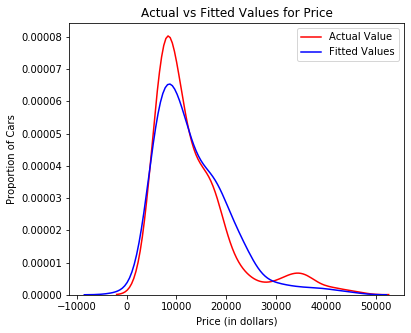

In [87]:
width = 6
height = 5
plt.figure(figsize=(width, height))


ax1 = sns.distplot(target, hist=False, color="r", label="Actual Value")
sns.distplot(yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

## b) Measures for In-Sample Evaluation

<p>When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.</p>

<p>Two very important measures that are often used in Statistics to determine the accuracy of a model are:</p>
<ul>
    <li><b>R^2 / R-squared</b></li>
    <li><b>Mean Squared Error (MSE)</b></li>
</ul>

<b>R-squared</b>

<p>R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.</p>
    
<p>The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.</p>

In [88]:
print('The R-square is: ', lm.score(features, target))

The R-square is:  0.8249864061913191


<b>Mean Squared Error (MSE)</b>

<p>The Mean Squared Error measures the average of the squares of errors, that is, the difference between actual value (y) and the estimated value (ŷ).</p>

In [89]:
from sklearn.metrics import mean_squared_error

print('The mean square error is: ',mean_squared_error(target, yhat))

The mean square error is:  10998143.911723318


<b>NOTE</b>
<ul>
    <li><i>What is a good R-squared value?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the higher R-squared value is a better fit</b> for the data.
<ul>
    <li><i>What is a good MSE?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the smallest MSE value is a better fit</b> for the data.</p>